# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\uug20\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
clean_hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [5]:
clean_hospital_read_df.shape

(11578, 12)

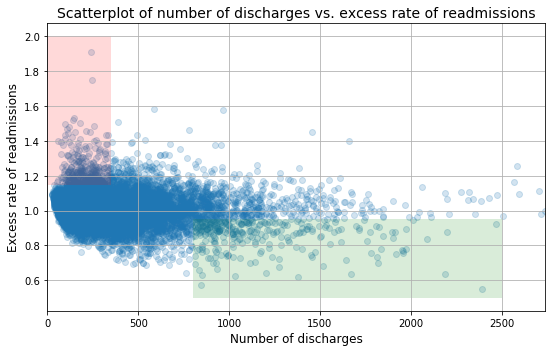

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [7]:
sum((clean_hospital_read_df["Number of Discharges"] > 100) & (clean_hospital_read_df["Number of Discharges"] < 1000))/len(clean_hospital_read_df)

0.8472965969942995

In [8]:
# Your turn

A. Do you agree with the above analysis and recommendations? Why or why not?

I do not agree with the analysis because

1. Except for what seems like two outliers (ratio > 1.7), there is no trend for the rate of readmissions as a function of number of discharges. The red and green shades highlighted in the figure are biased. For lower values of $x$, there are many $y$ that have high values but not highlighted in red. Similarly, for higher values of $x$, there are many higher $y$ values that are not shaded in green.

2. In terms of statisitcs shown, the analysis is done by considering number of discharges less than 100 and greater than 1000. Though the statistical analysis suggests that the hospitals with smaller number of discharges have higher readmission rates, the analysis cannot be trusted because significant fraction of data points (84.7$\%$) lie when the number of discharges are between about 100 and 1000. Therefore, any analysis done outside this range does not represent the whole data. In other words, the statistical analysis is based on only 15.3$\%$ data.


The conclusions and the recommendations cannot be agreed without further analysis. It is possible that there is a trend between the number of discharges and the readmission ratio but we need to test this using the data. Any recommnedations about either giving more incentives to hospitals with higher discharges, and making hospitals with lower capacity demonstrate upgraded resources cannot be taken seriously. Moreover, the term "capacity" is used in the recommendation which has not been observed in the data set. Assuming it is same (or highly correlated with number of discharges), it is not clear why the number "300" is picked up. This number did not appear in the analysis.  

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

Let's first shade the colors differently so that the range used in the statistical analysis is clear:

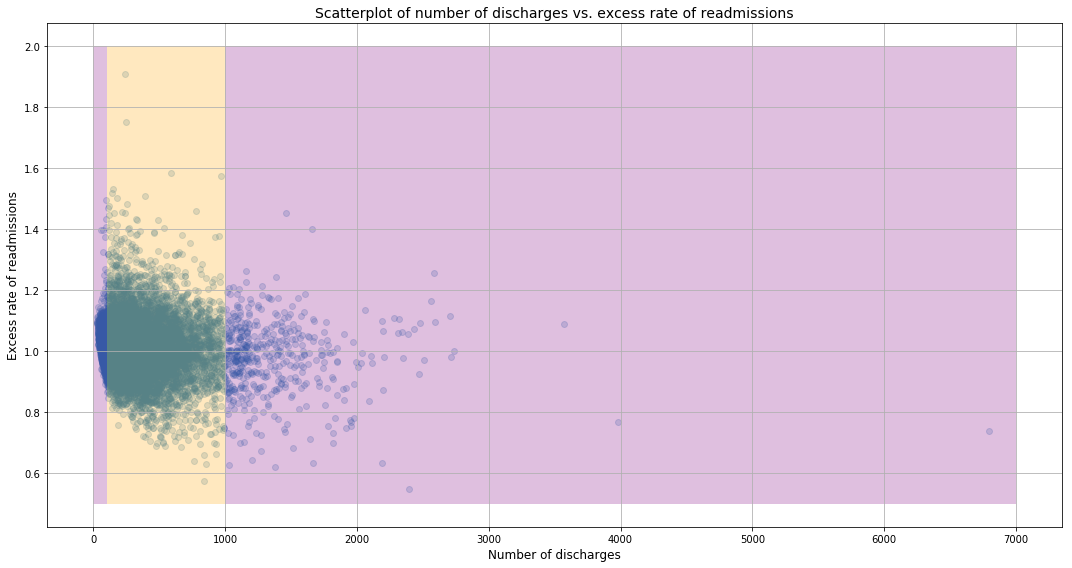

In [9]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:])

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,100], 0.5, 2, facecolor='purple', alpha = .25, interpolate=True)
ax.fill_between([100,1000], 0.5, 2, facecolor='orange', alpha = .25, interpolate=True)
ax.fill_between([1000,7000], .5, 2, facecolor='purple', alpha = .25, interpolate=True)

#ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

The data points shaded in purple represent only 15.3$\%$ data, whereas the orange patch shows the left out data in the statistical analysis. Note that in the original analysis the last three points were ignored (probably due to very large x values), we included them in the above plot. To show, more clearly, how much fraction of data points is covered in a given range of the number of dischrges, we plot the cumulative distribution of the number of discharges.

In [10]:
clean_hospital_read_df["Number of Discharges"].max()

6793

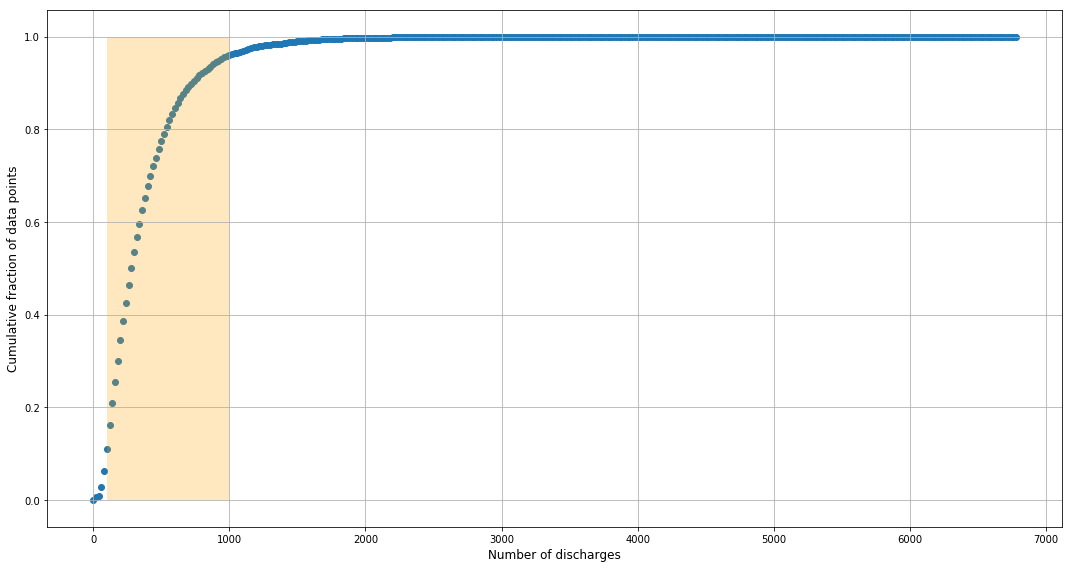

In [11]:
x1 = np.arange(0, 6800, 20)
y1 = [sum(clean_hospital_read_df["Number of Discharges"] < xi)/len(clean_hospital_read_df) for xi in x1]

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x1, y1)
ax.fill_between([100,1000], 0, 1, facecolor='orange', alpha = .25, interpolate=True)
#ax.fill_between([1000,2800], .5, 1.6, facecolor='green', alpha = .15, interpolate=True)

#ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Cumulative fraction of data points', fontsize=12)

ax.grid(True)
fig.tight_layout()

Clearly, there is a significant amount of data when the number of discharges are between 100 and 1000 (shaded in orange), which was ignored in the statistical analysis. 


Lets now check if the results obtained from the original analysis are correct. Since the results have mean values, lets fix the missing values first.

In [12]:
# number of missing values in "Excess Readmission Ratio"
sum(pd.isnull(clean_hospital_read_df["Excess Readmission Ratio"]))

81

In [13]:
# number of missing values in "Number of Discharges"
sum(pd.isnull(clean_hospital_read_df["Number of Discharges"]))

0

When do we get missing values in "Excess Readmission Ratio"? Is it when "Number of Discharges" = 0?

In [14]:
sum(clean_hospital_read_df["Number of Discharges"][pd.isnull(clean_hospital_read_df["Excess Readmission Ratio"])] == 0)

81

Yes, that is the case. So, lets remove these 81 rows and create a new data frame.

In [15]:
df = clean_hospital_read_df[pd.notnull(clean_hospital_read_df["Excess Readmission Ratio"])]
df.shape

(11497, 12)

Lets now verify some numbers that were reported in the original analysis.

1. In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

2. In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [16]:
df_lessthan_100 = df[df["Number of Discharges"] < 100]

In [17]:
df_lessthan_100["Excess Readmission Ratio"].mean()

1.0226183501683506

In [18]:
sum(df_lessthan_100["Excess Readmission Ratio"] > 1)/len(df_lessthan_100)

0.6321548821548821

In [19]:
df_greaterthan_1000 = df[df["Number of Discharges"] > 1000]

In [20]:
df_greaterthan_1000["Excess Readmission Ratio"].mean()

0.9783354211663071

In [21]:
sum(df_greaterthan_1000["Excess Readmission Ratio"] > 1)/len(df_greaterthan_1000)

0.4449244060475162

Okay, the results reported in the original analysis are correct. However, we do not think the conclusions about the trends are correct. We are going to test this conclusion now.

Overall, we think that there is no trend and so we test this using Peasrson's R. 


$H_0$: number of discharges has no influence on the readmission ratio


$H_a$: number of discharges influences the readmission ratio

If we want to use Pearson's R then, we have to first make sure that both variables are normally distributed.

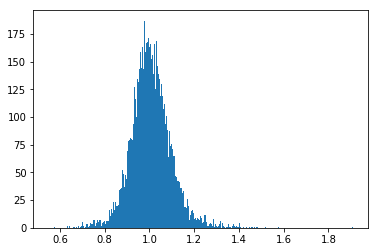

In [22]:
p1 = plt.hist(df["Excess Readmission Ratio"], 500)

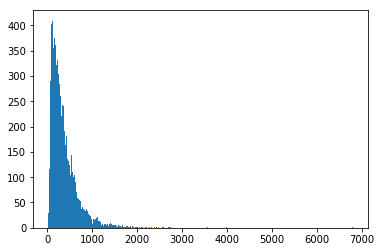

In [23]:
p1 = plt.hist(df["Number of Discharges"], 500)

The number of discharge variable is not normally distributed. We can try to do a logarithmic transforamtion and see if that helps.

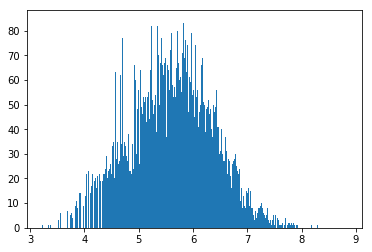

In [24]:
p1 = plt.hist(np.log(df["Number of Discharges"]), 500)

The log of the number of discharges seems normally distributed, so we can now calculate Pearson's r and associated p-value.

In [25]:
stats.pearsonr(np.log(df["Number of Discharges"]), df["Excess Readmission Ratio"])

(-0.09766978480467148, 8.962784605028911e-26)

There is a very weak negative correlation between the two variables. This correlation is statistically significant as p-value is almost 0. We can calculate the confidence interval around the r value and check if the interval has only negative values. This will assert the fact that we do have negative correlation, weak though.

In [26]:
stats.linregress(np.log(df["Number of Discharges"]), df["Excess Readmission Ratio"])

LinregressResult(slope=-0.01171431266578428, intercept=1.0732691866644413, rvalue=-0.09766978480467146, pvalue=8.962784604972498e-26, stderr=0.0011133217610828237)

In [27]:
slope = -0.011714312665784279
stderr = 0.0011133217610828237

If we want 99% confidence interval and assume a z distribution, the confidence interval will be:

In [28]:
ci1 = slope - (2.8*stderr)
ci2 = slope + (2.8*stderr)

In [29]:
print("99% confidence interval: ", ci1, "-", ci2)

99% confidence interval:  -0.014831613596816185 - -0.008597011734752373


The confidence interval has only negative values so we do have negative correlation.

However, in terms of practicality, we do not think the correlation is strong enough to make serious recommendations. So, we can say that the correlation is ***statistically significant*** but ***practically not significant***.

Since we saw the log of number of discharge gave normal distribution, lets replot the scatter with x axis as log scale.

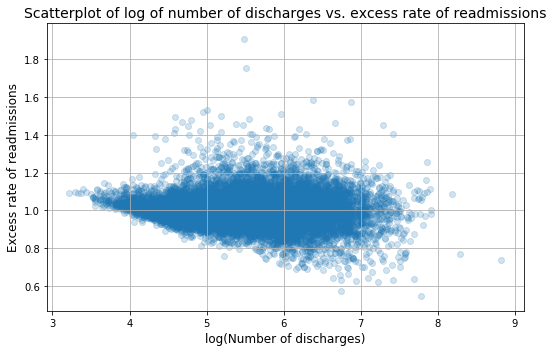

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(np.log(x), y,alpha=0.2)

#ax.set_xlim([0, max(x)])
ax.set_xlabel('log(Number of discharges)', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of log of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

By looking at the plot, we can definitely say that the correlation is practically not significant.

The original analysis also recommends that hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation. We can see if there is any significant difference between the readmission rates for two groups: (i) group with small capacity (< 300), and (ii) group with large capacity (>= 300). Lets first create two data frames for these two groups.

In [31]:
df1 = df[df["Number of Discharges"] < 300]
df2= df[df["Number of Discharges"] >= 300]

In [32]:
# means
m1 = df1["Excess Readmission Ratio"].mean()
m2 = df2["Excess Readmission Ratio"].mean()
print("Means of readdmision rates in two groups: ", m1, m2)

Means of readdmision rates in two groups:  1.0142382121807445 0.9998708480237513


Whats the effect size here? And is that significant?

In [33]:
print("Effect size: ", abs(m1-m2))

Effect size:  0.014367364156993245


We are going to perform two sample difference hypothesis test. Lets calculate the standard deviations (SD) of both groups. Our null hypothesis would be that there is no difference between the means. And the alternate hypothesis would be that there is a siginificant difference.

In [34]:
std1 = df1["Excess Readmission Ratio"].std()
std2 = df2["Excess Readmission Ratio"].std()
print("SD of both groups: ", std1, std2)

SD of both groups:  0.08247820844558373 0.101118258486653


We do not know the population SD, so the sample SD can be taken as estimate for population SDs, provided we have enough sample points.

In [35]:
print("Sample points in both groups: ", len(df1), len(df2))

Sample points in both groups:  6108 5389


We have enough sample points. So the population SDs are std1 and std2. We now calculate the standard error of mean for both groups:

In [36]:
stderr1 = std1/np.sqrt(len(df1))
stderr2 = std2/np.sqrt(len(df2))
print("Std errors are: ", stderr1, stderr2)

Std errors are:  0.0010553334519908034 0.0013774488777832051


We can calculate pooled variance and hence the std err to get p-value. But lets rather use stats.ttest_ind() function.

In [37]:
stats.ttest_ind(df1["Excess Readmission Ratio"], df2["Excess Readmission Ratio"], equal_var=False)

Ttest_indResult(statistic=8.279706368011247, pvalue=1.3862099593114599e-16)

The t-statistic is pretty high OR the probability that the difference in means is 0 is very low. In other words,  the probability that we see the difference in means "by chance" is pretty low. We reject the null in favor of the alternate hypothesis that there is a significant difference between the two groups. 


Again, statistically what the original analysis recommends is correct. However, why only 300 as cutoff? We can try another cutoff, say 700 and do the above analysis again:

In [38]:
df1 = df[df["Number of Discharges"] < 700]
df2= df[df["Number of Discharges"] >= 700]
stats.ttest_ind(df1["Excess Readmission Ratio"], df2["Excess Readmission Ratio"], equal_var=False)

Ttest_indResult(statistic=6.129020665556234, pvalue=1.139066371304616e-09)

We again reject the null. So, though the results from original analysis is statistically siginificant, it is practically not significant. One can chhose any value of cutoff. The correct study would focus on changing this cutoff and seeing how cutoff affects the effect size (which is statistically significant). The cutoff for which we will see the highest effect size (statistically significant) will be the one which should be used to make similar recommendation as was made in the original analysis. Lets try to understand the effect of cutoff.

In [39]:
# function to calculate both effect size and associated p-value
def effect_size(cutoff):
    df1 = df[df["Number of Discharges"] < cutoff]
    df2= df[df["Number of Discharges"] >= cutoff]
    m1 = df1["Excess Readmission Ratio"].mean()
    m2 = df2["Excess Readmission Ratio"].mean()
    test = stats.ttest_ind(df1["Excess Readmission Ratio"], df2["Excess Readmission Ratio"], equal_var=False)
    return(abs(m1-m2), test[1])

In [40]:
# creating an array for cutoff values
cutoffArray = np.arange(30, 6800, 20)
# calculating differences in means (effect size), and associated p-values
result = [effect_size(cutoff) for cutoff in cutoffArray]

C:\Users\uug20\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\uug20\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\uug20\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\uug20\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\uug20\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [41]:
# creating a data frame for plotting and analysis
dfr = pd.DataFrame(result, columns=["EffectSize", "P-value"])
dfr["CutOff"] = cutoffArray

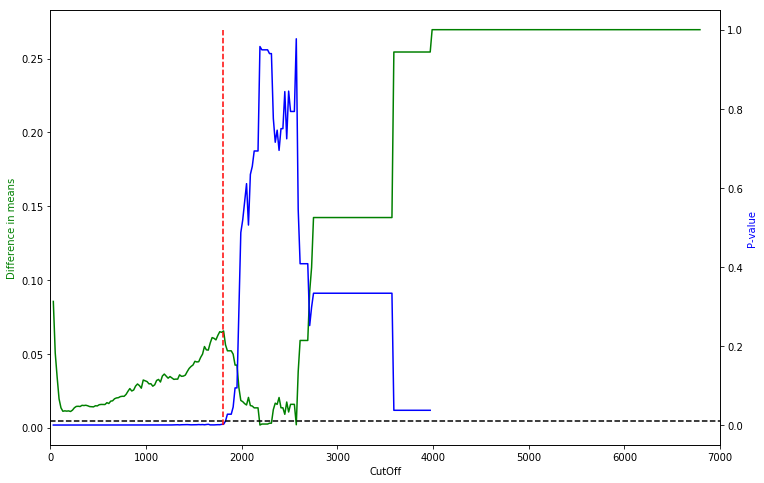

In [42]:
fig, ax1 = plt.subplots(figsize=(12,8))

ax2 = ax1.twinx()
ax1.plot(dfr.CutOff, dfr.EffectSize, 'g-')
ax2.plot(dfr.CutOff, dfr["P-value"], 'b-')

ax1.set_xlabel('CutOff')
ax1.set_ylabel('Difference in means', color='g')
ax2.set_ylabel('P-value', color='b')

ax1.set_xlim([0, 7000])
ax2.set_xlim([0, 7000])

plt.plot((0, 7000), (0.01, 0.01), 'k--')
plt.plot((1800, 1800), (0.0, 1), 'r--')

plt.show()

We have plotted the differences in means as function of cutoff on the left axis (green). We also show the p-values on the right axis (blue). The horizontal dashed black line shows the significance level $\alpha = 0.01$. The effect size gets larger and larger and levels off at around cutoff = 4000 but that difference in means is statistically not significant as shown by larger p-values. The p-values starts to increase rapidly after around cutoff=1800, which is indicated by a vertical red dashed line. There are two cutoff points that suggest best results: (i) the very first data point, i.e. cutoff = 30, and (ii) cutoff = 1800. Based on the analysis done above, cutoff = 30 looks best but further analysis might be required to confirm this.